# BOOM BIKES CASE STUDY - SOLUTION

# Libraries Used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [2]:
#to center align the graphs
from IPython.core.display import HTML
HTML("""<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

# Importing Data

In [3]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Displayig some basic information about the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<blockquote> Based on the Non Null Column the dataset doesnot contain any non null values - Hence this would mean that we need not proceed in the direction of dataa imputation </blockquote>

In [5]:
#Displaying additional statistics on the dataframe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<blockquote> Target Variable is "cnt" - which is the count of total rental bikes including both casual and registered bike rentals </blockquote>

#### Column Drops

In [6]:
# drop instant column - since this performs the same function as index.
bike = bike.drop("instant", axis = 1)

# Data Preparation

### Converting numerical features to categorical features.

In [7]:
#weathersit
bike[["weathersit"]] = bike[["weathersit"]].apply(lambda x : x.map({1:"Good",2:"Moderate",3:"Bad",4: "Worse"}))
#season
bike[["season"]] = bike[["season"]].apply(lambda x : x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))


### DATE Column Preparation

In [8]:
#dteday Treatment
bike["dteday"] = pd.to_datetime(bike["dteday"], dayfirst = True)
bike["Day Name"] = bike["dteday"].dt.day_name()
# Allthough we have a column titled yr which has 2018 and 2019 - converting this for eda and and then retreating it for model analysis would be cumbersome
bike["Year"] = bike.dteday.dt.year
bike["Month Name"] = bike.dteday.dt.month_name()

### Derived Metrics Addition

In [9]:
#below numerical derived columns were tried and was found to be irrelevant to the analysis

#bike["hum/atemp"] = bike["hum"]/bike["atemp"]
#bike["atemp/windspeed"] = bike["atemp"]/bike["windspeed"]
#bike["hum/(atemp)*windspeed"] = bike["hum"]/(bike.atemp*bike.windspeed)

In [10]:
#### Good Weather + Working Day
def categorize(x):
    if (x["weathersit"] == "Good") and (x["workingday"] == 1):
        return 1
    else:
        return 0
bike["Good+Working"] = bike.apply(lambda x: categorize(x),axis = 1)

# Data Visualization and Exploratory Data Analysis

In [11]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day Name,Year,Month Name,Good+Working
0,2018-01-01,spring,0,1,0,6,0,Moderate,14.110847,18.18125,80.5833,10.749882,331,654,985,Monday,2018,January,0
1,2018-01-02,spring,0,1,0,0,0,Moderate,14.902598,17.68695,69.6087,16.652113,131,670,801,Tuesday,2018,January,0
2,2018-01-03,spring,0,1,0,1,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Wednesday,2018,January,1
3,2018-01-04,spring,0,1,0,2,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Thursday,2018,January,1
4,2018-01-05,spring,0,1,0,3,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Friday,2018,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,12,0,4,1,Moderate,10.420847,11.33210,65.2917,23.458911,247,1867,2114,Friday,2019,December,0
726,2019-12-28,spring,1,12,0,5,1,Moderate,10.386653,12.75230,59.0000,10.416557,644,2451,3095,Saturday,2019,December,0
727,2019-12-29,spring,1,12,0,6,0,Moderate,10.386653,12.12000,75.2917,8.333661,159,1182,1341,Sunday,2019,December,0
728,2019-12-30,spring,1,12,0,0,0,Good,10.489153,11.58500,48.3333,23.500518,364,1432,1796,Monday,2019,December,0


### PairPlot

##### click on image to enlarge

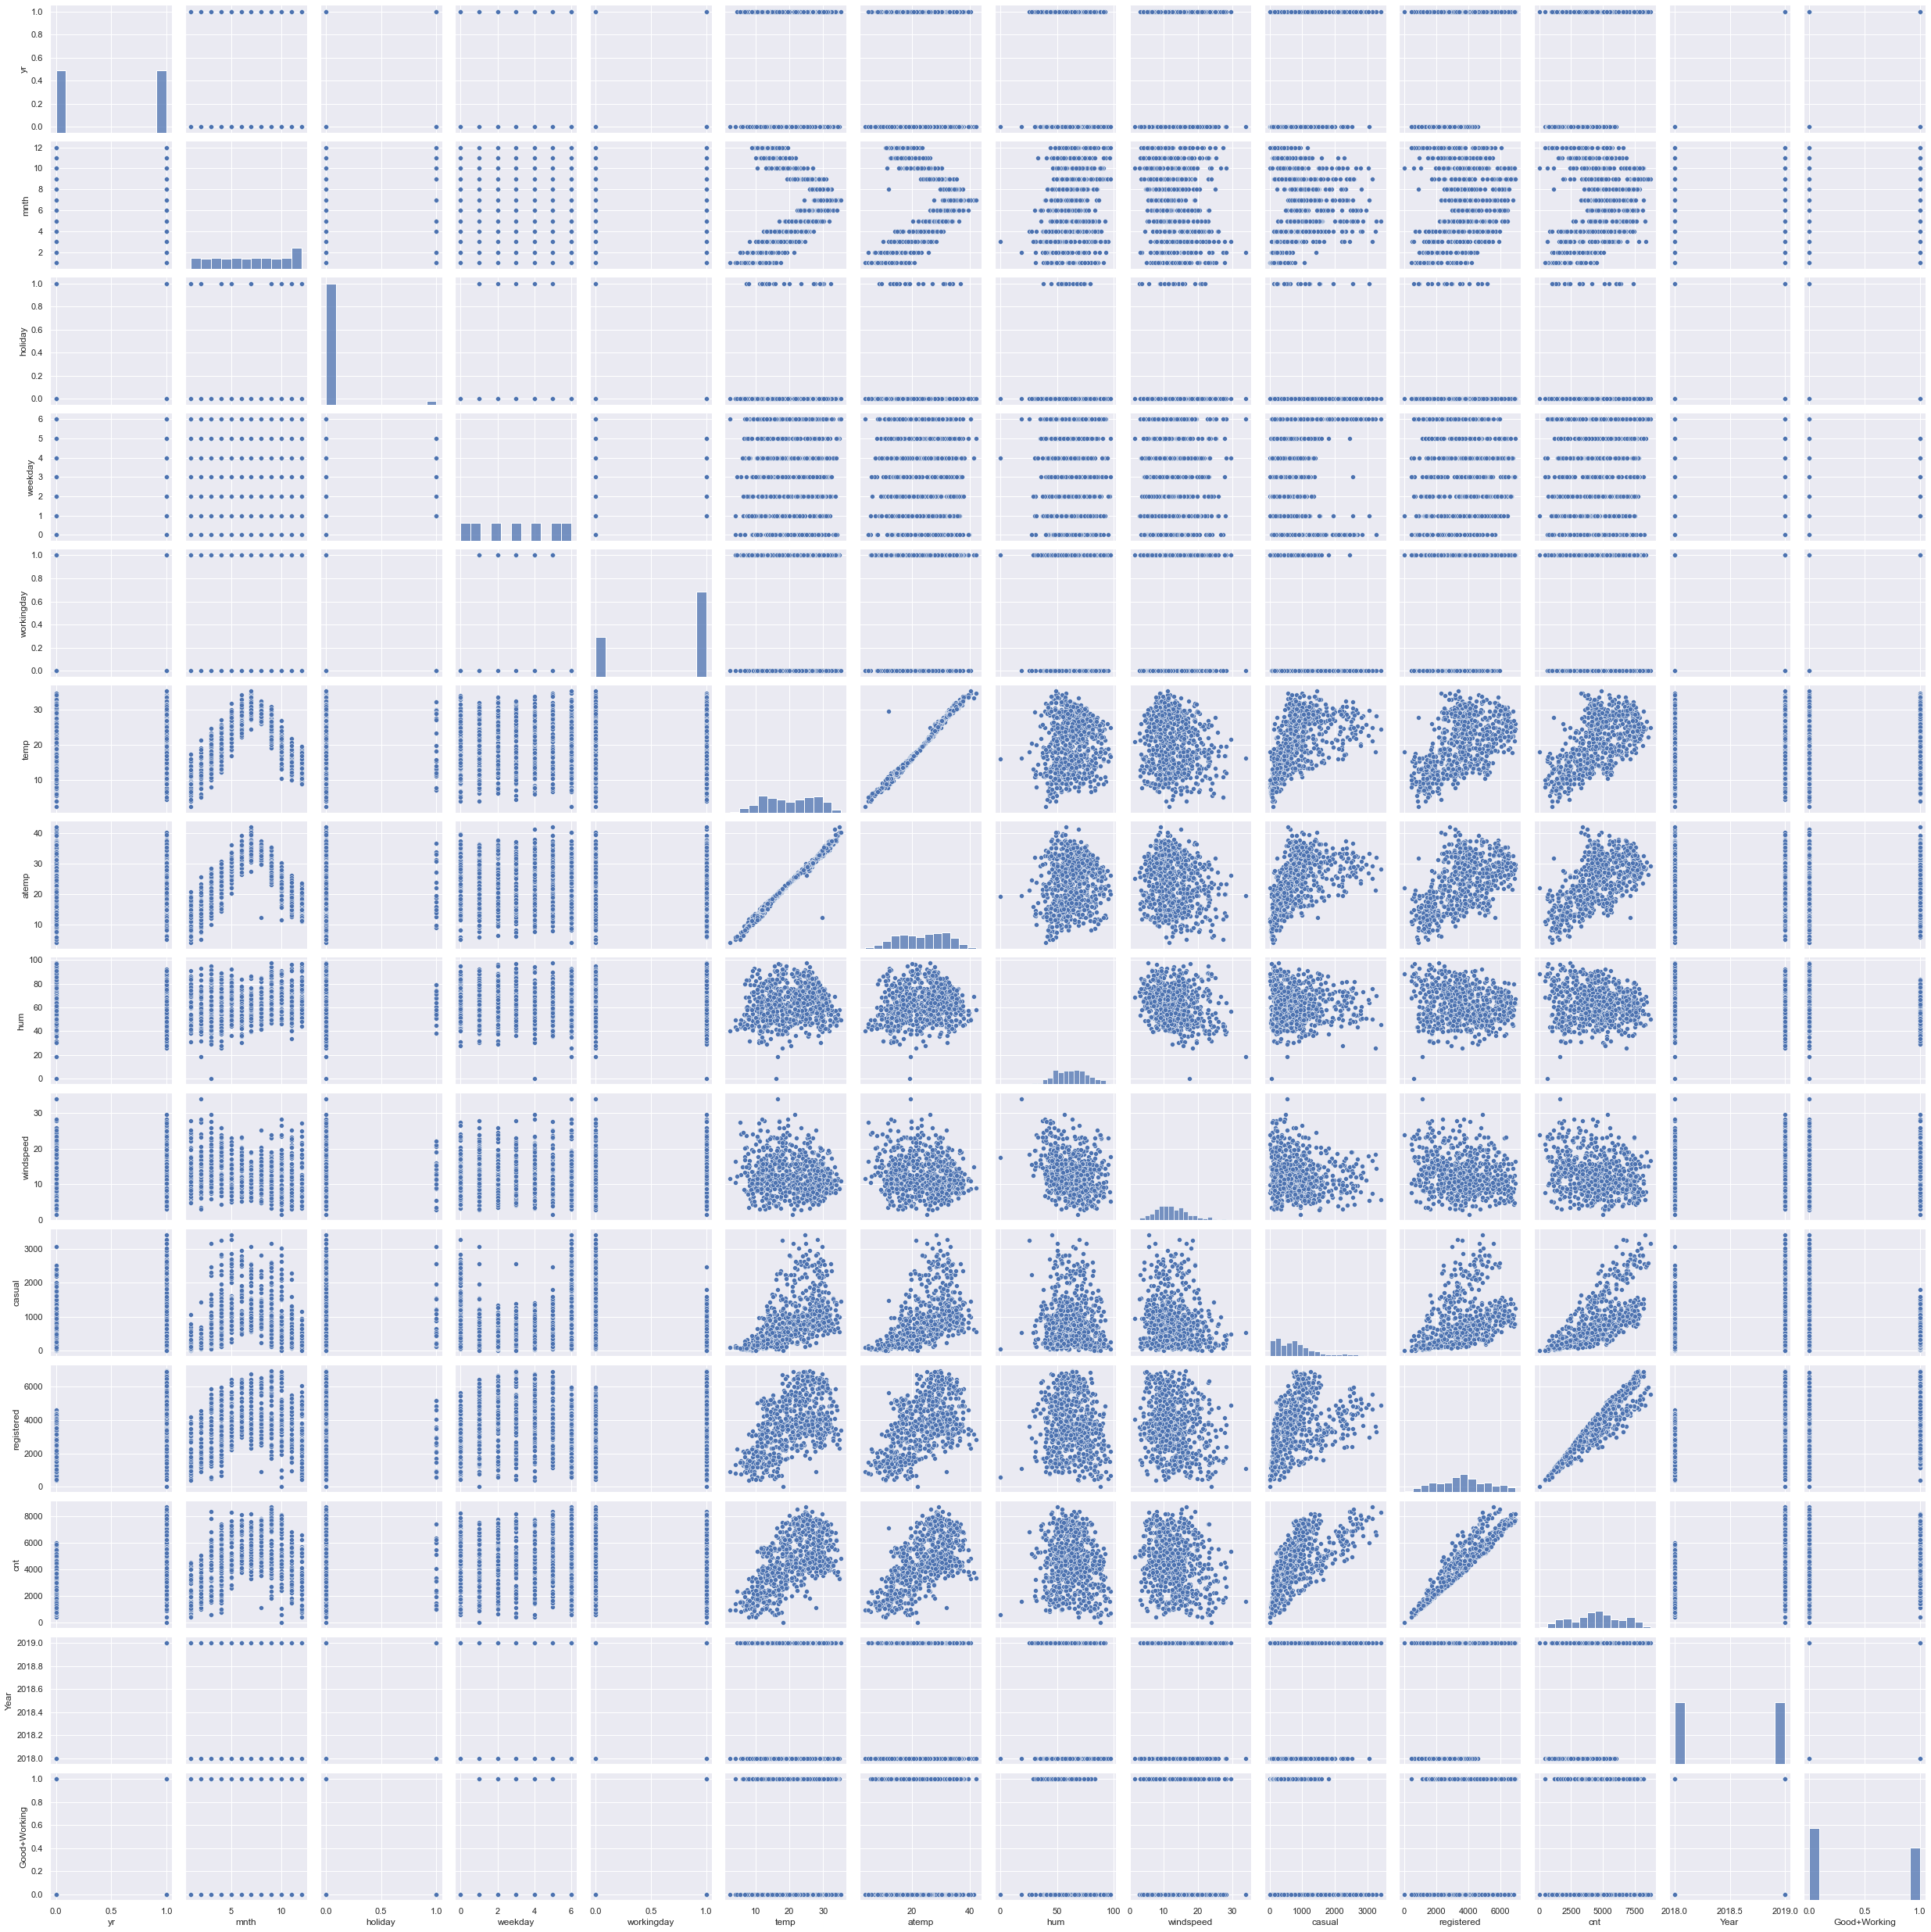

In [12]:
sns.set(rc = {"figure.figsize" : (20,20)})
sns.pairplot(data = bike)
plt.show()

<blockquote> The pair plots show us on a high level that a Linear Regression Model could be a good model since the target variable has some linearity between some of the independent variables. </blockquote>

### Demand for Cycles over year

<Figure size 504x360 with 0 Axes>

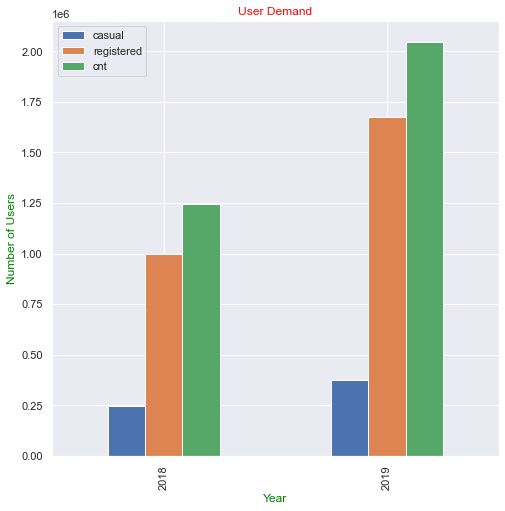

In [13]:
temp = bike.groupby(by = "Year").sum()
plt.figure(figsize = (7,5))
temp.plot(use_index = True, y = ["casual","registered","cnt"], kind = "bar", figsize = (8,8))
plt.title("User Demand", fontdict = {"fontweight" : 10, "color" : "red"})
plt.xlabel("Year",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Number of Users",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

### Demand for Cycles over time - 2018

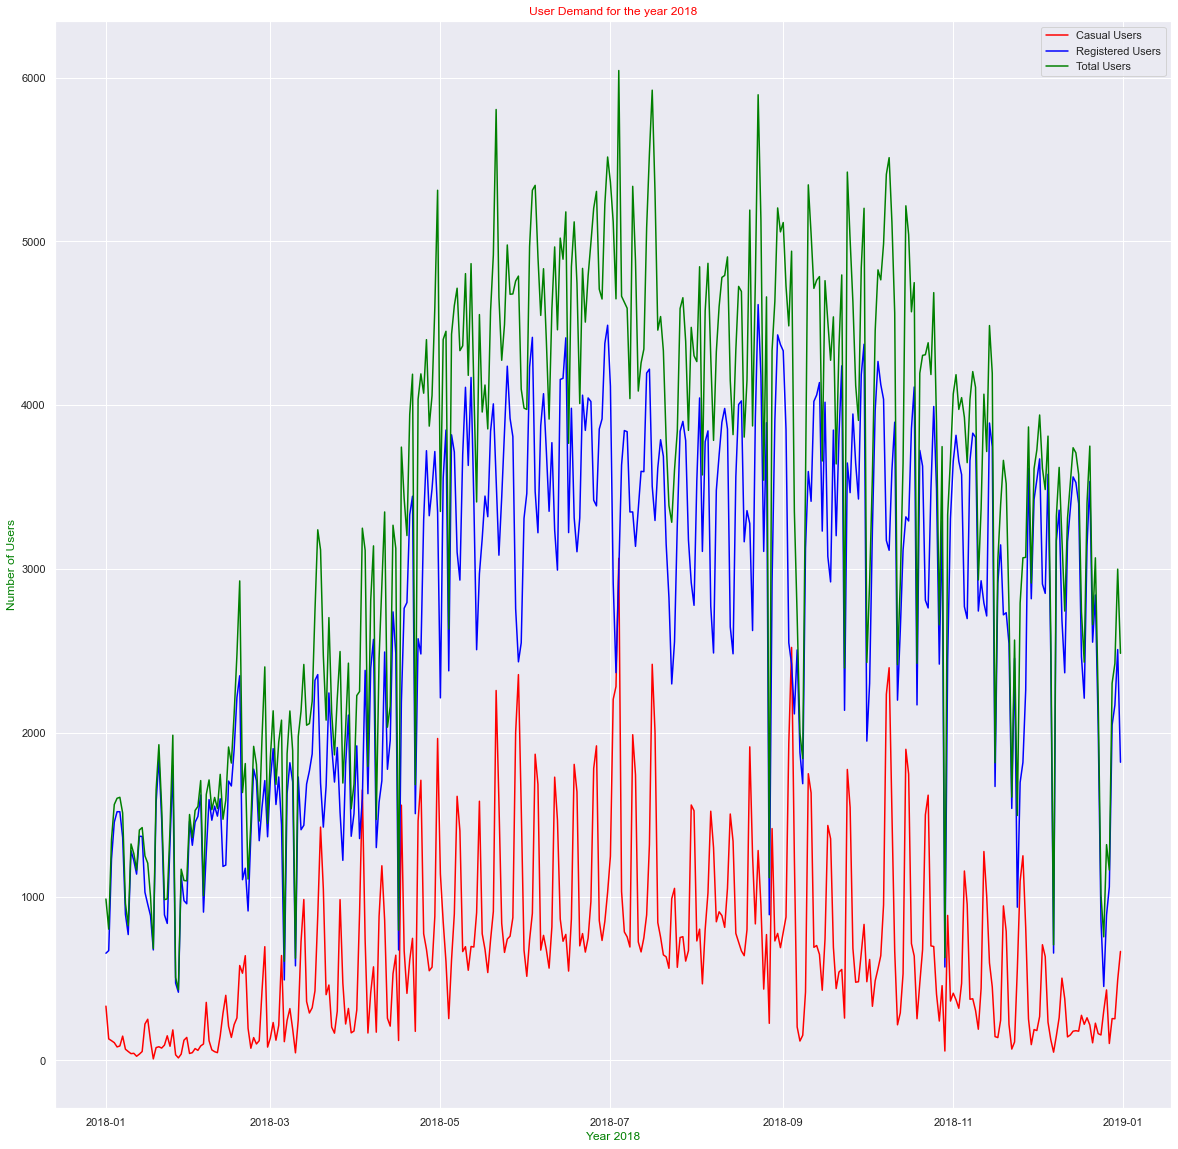

In [14]:
temp = bike[(bike["Year"] == 2018)]
plt.figure(figsize = (20,20))
plt.title("User Demand for the year 2018", fontdict = {"fontweight" : 10, "color" : "red"})
plt.xlabel("Year 2018",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Number of Users",fontdict = {"fontweight" : 10, "color" : "green"})
sns.lineplot(y = temp["casual"],x = temp["dteday"], color = "red", label = "Casual Users")
sns.lineplot(y = temp["registered"],x = temp["dteday"], color = "blue",label = "Registered Users")
sns.lineplot(y = temp["cnt"],x = temp["dteday"], color = "green",label = "Total Users")
plt.show()

### Demand for Cycles over time - 2019

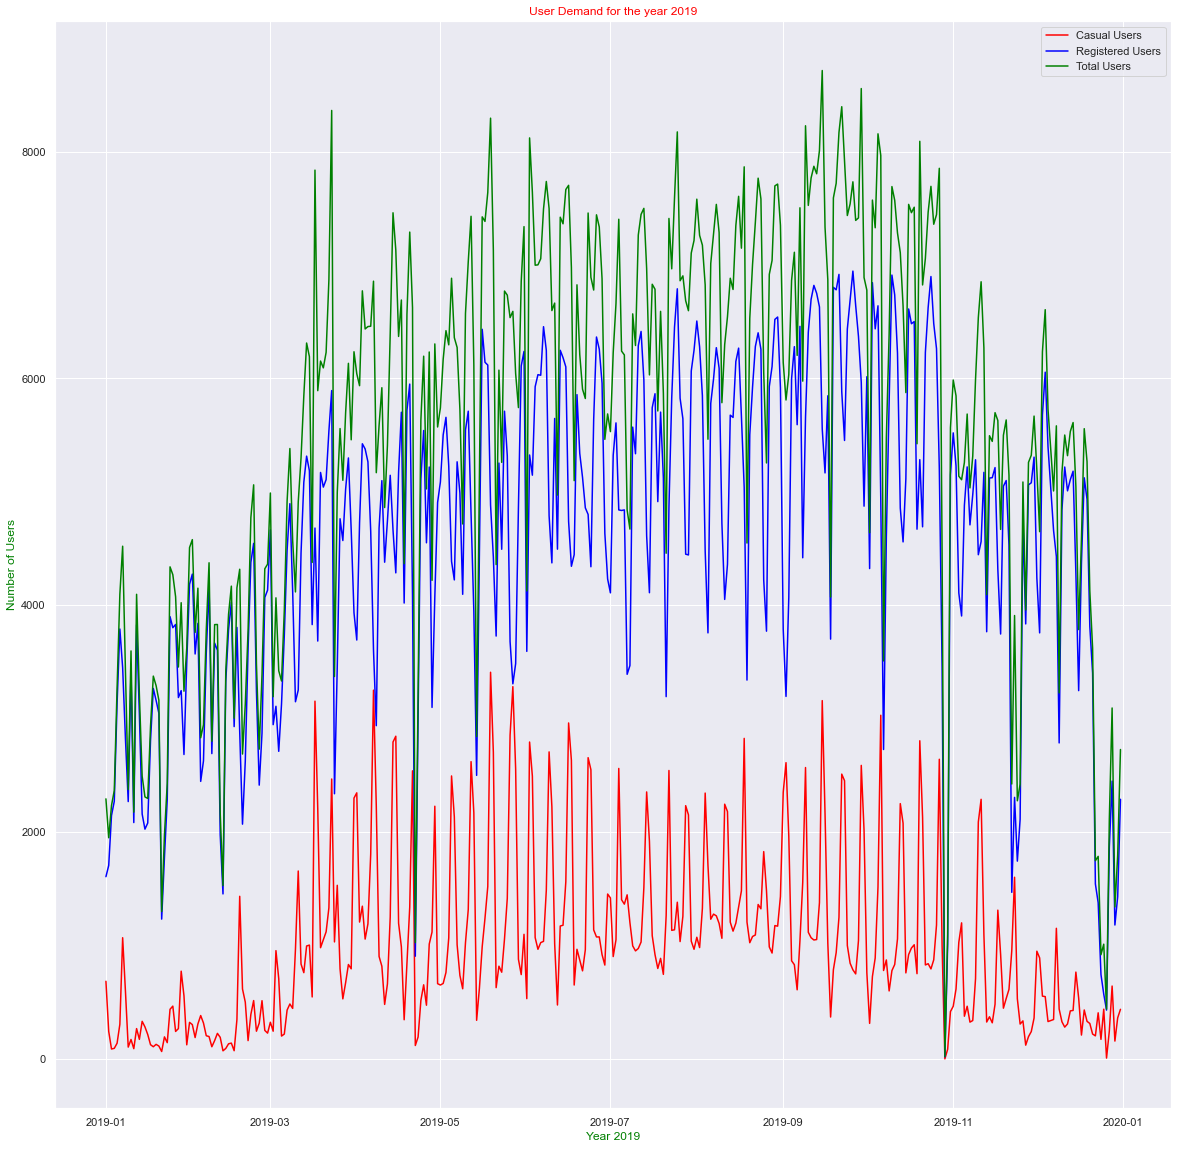

In [15]:
temp = bike[(bike["Year"] == 2019)]
plt.figure(figsize = (20,20))
plt.title("User Demand for the year 2019", fontdict = {"fontweight" : 10, "color" : "red"})
plt.xlabel("Year 2019",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Number of Users",fontdict = {"fontweight" : 10, "color" : "green"})
sns.lineplot(y = temp["casual"],x = temp["dteday"], color = "red", label = "Casual Users")
sns.lineplot(y = temp["registered"],x = temp["dteday"], color = "blue",label = "Registered Users")
sns.lineplot(y = temp["cnt"],x = temp["dteday"], color = "green",label = "Total Users")
plt.show()

### Demand during days

<Figure size 504x360 with 0 Axes>

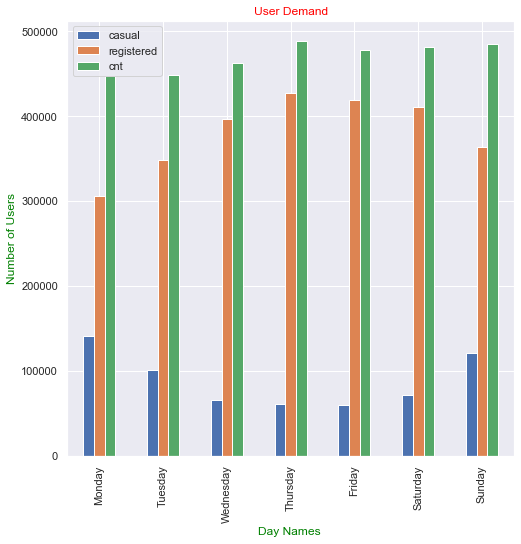

In [16]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp = bike.groupby(by = "Day Name").sum().reindex(cats)
plt.figure(figsize = (7,5))
temp.plot(use_index = True, y = ["casual","registered","cnt"], kind = "bar", figsize = (8,8))
plt.title("User Demand", fontdict = {"fontweight" : 10, "color" : "red"})
plt.xlabel("Day Names ",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Number of Users",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

### Demand during Seasons

<Figure size 504x360 with 0 Axes>

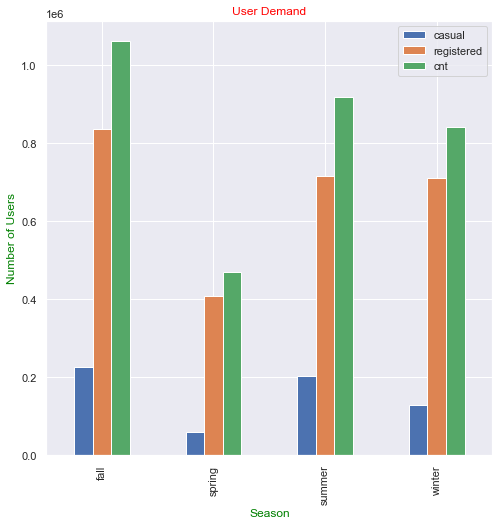

In [17]:
temp = bike.groupby(by = "season").sum()
temp = temp.reset_index()
plt.figure(figsize = (7,5))
temp.plot(x = "season", y = ["casual","registered","cnt"], kind = "bar", figsize = (8,8))
plt.title("User Demand", fontdict = {"fontweight" : 10, "color" : "red"})
plt.xlabel("Season",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Number of Users",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

### Demand during Working Days

<Figure size 504x360 with 0 Axes>

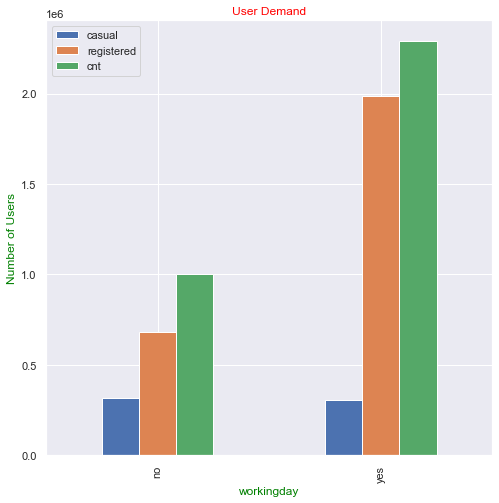

In [18]:
temp = bike.groupby(by = "workingday").sum()
temp = temp.reset_index()
temp[["workingday"]] = temp[["workingday"]].apply(lambda x : x.map({1:"yes", 0:"no"}))
plt.figure(figsize = (7,5))
temp.plot(x = "workingday", y = ["casual","registered","cnt"], kind = "bar", figsize = (8,8))
plt.title("User Demand", fontdict = {"fontweight" : 10, "color" : "red"})
plt.xlabel("workingday",fontdict = {"fontweight" : 10, "color" : "green"})
plt.ylabel("Number of Users",fontdict = {"fontweight" : 10, "color" : "green"})
plt.show()

<blockquote>
<b>EDA Conclusions:</b>
   
    1. The average demand has increased from 2018 to 2019 (increased atleast by 1.5 times). The increase in registered customer is more prominent than that of casual customers.
    
    2. The demand increases from start of the year and peaks at mid year and starts dropping towards end of year (to be precise - during the period of May - October). Possible reasoning for this could include that weather tends to get worse during early year start and year end. Its typically Summer/fall (autumn) season during mid year in US.
    
    3. Deep diving into days - We obeserve the pattern that most users tend to use the bikes less at start of the week (Mondays, Tuesdays ..) but the value increases over to weekend. However looking in depth tells us that Registered Users tend to decrease during Sundays whereas Casual users tend to use it more frequently during Sundays and Mondays. It decreases during the mid of week (Wednesdays, Thursdays ...).
    
    4. The demand during seasons stands similar to the statement made in point 2. The highest demand is during the fall (autumn) season, followed by summer and winter and the least is during spring. The trend follows similarly for both casual and registered users.
    
    5. Majority of the demand is during the non holiday day - this could possibly be that most of the user base use it could be working professional who use it for short commute
</blockquote>

### HeatMap

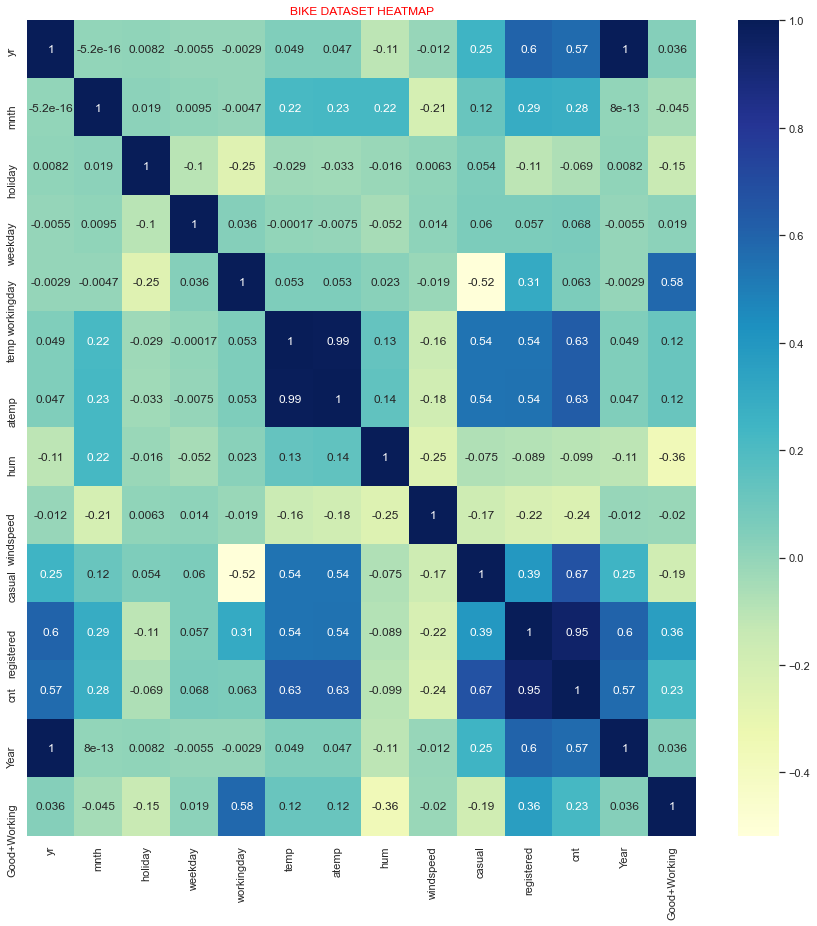

In [19]:
plt.figure(figsize = (15,15))
plt.title("BIKE DATASET HEATMAP", fontdict = {"fontweight" : 20, "color" : "red"})
sns.heatmap(bike.corr(), annot = True, cmap = "YlGnBu")
plt.show()

# Encoding

In [20]:
#Encoding Season Column
dummy = pd.get_dummies(bike.season)
bike = pd.concat([bike, dummy], axis = 1)
#dropping summer column
bike = bike.drop("summer", axis = 1)

#Encoding Weather Sit Column
dummy = pd.get_dummies(bike.weathersit)
bike = pd.concat([bike,dummy],axis = 1)
#dropping Bad Weather column - 
bike = bike.drop("Bad", axis = 1)

#Encoding Day Name Column
dummy = pd.get_dummies(bike["Day Name"])
bike = pd.concat([bike,dummy],axis = 1)
#dropping Wednesday column
bike = bike.drop("Wednesday", axis = 1)

dummy = pd.get_dummies(bike["Month Name"])
bike = pd.concat([bike,dummy], axis = 1)
#dropping March column
bike = bike.drop("March", axis = 1)

<blockquote> The reasoning behind not to follow drop_first = True was to retain some of the important columns which might be able to provide better insights from a coefficient perspective to the model </blockquote>

In [21]:
bike.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,August,December,February,January,July,June,May,November,October,September
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,...,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.082192
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,...,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.274845
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dropping Columns (after encoding)

In [22]:
bike = bike.drop(["mnth","weekday","casual","registered","Year","Day Name","Month Name","season","dteday","weathersit"],axis = 1)

<blockquote> 

1. The reasoning for dropping Casual and Registered column before our modelling is that - any results you derive for cnt variable can be related to casual and registered on a holistic level. 

2. Rest of the dropped columns such as mnth,weekday and Year, Day Name, Month Name,season,dteday, weathersit are redundant columns - they have been already been retained in the dataset as part of encoding - and they were retained so far for better visualizaton in EDA

</blockquote>

In [23]:
bike.mean()

yr                 0.500000
holiday            0.028767
workingday         0.683562
temp              20.319259
atemp             23.726322
hum               62.765175
windspeed         12.763620
cnt             4508.006849
Good+Working       0.420548
fall               0.257534
spring             0.246575
winter             0.243836
Good               0.634247
Moderate           0.336986
Friday             0.142466
Monday             0.143836
Saturday           0.142466
Sunday             0.142466
Thursday           0.142466
Tuesday            0.143836
April              0.082192
August             0.084932
December           0.084932
February           0.076712
January            0.084932
July               0.084932
June               0.082192
May                0.084932
November           0.082192
October            0.084932
September          0.082192
dtype: float64

# Train and Test Data

In [24]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.8, random_state = 50)

In [25]:
print(bike_train.shape)
print(bike_test.shape)

(584, 31)
(146, 31)


# Scaling

##### We intend to use MinMaxScaler for this case study

In [26]:
#scaling the training set
scaler = MinMaxScaler()
num_vars = ["atemp","hum","windspeed","temp"]
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

<blockquote> The proposal is not to scale the target variable </blockquote>

# Model Building

In [27]:
y_train = bike_train.pop("cnt")
X_train = bike_train

## VIF Check

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
def vif_calculator(X):
    temp = X
    temp.pop("const")
    vif = pd.DataFrame()
    vif['Variables'] = temp.columns
    vif['VIF'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

## Backward Modelling

### Applying Recursive Feature Elimination

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm_rfe = LinearRegression()
lm_rfe.fit(X_train,y_train)
rfe = RFE(lm_rfe,15) #choosing top 15 variables
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Good+Working', False, 8),
 ('fall', False, 10),
 ('spring', True, 1),
 ('winter', True, 1),
 ('Good', True, 1),
 ('Moderate', True, 1),
 ('Friday', False, 14),
 ('Monday', False, 5),
 ('Saturday', False, 11),
 ('Sunday', False, 9),
 ('Thursday', False, 12),
 ('Tuesday', False, 4),
 ('April', False, 16),
 ('August', False, 15),
 ('December', True, 1),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('May', False, 2),
 ('November', True, 1),
 ('October', False, 6),
 ('September', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [33]:
temp = X_train

<blockquote> Backward Modelling Summary : 
        
        1. The general approach was to drop varaibles that had high p value. Hence wherever there is no explanation below - it was based on the assumption that we drop the varaible having high p value.
        
        2. Where there was a deviation from the above mentioned approach - reasoning has been given below.
    
</blockquote>

In [34]:
def model_calculator(string):
    global temp
    global lm
    temp = temp.drop(string,axis = 1)
    X_train_m = temp
    X_train_m = sm.add_constant(X_train_m)
    lm = sm.OLS(y_train,X_train_m).fit()
    print(lm.summary())
    vif_calculator(X_train_m)
    return lm

#### Model 1

In [35]:
X_train_m = temp
X_train_m = sm.add_constant(X_train_m)
lm1 = sm.OLS(y_train,X_train_m).fit()
print(lm1.summary())
vif_calculator(X_train_m)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.57e-219
Time:                        11:43:35   Log-Likelihood:                -4706.6
No. Observations:                 584   AIC:                             9445.
Df Residuals:                     568   BIC:                             9515.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1561.5482    371.575      4.203      0.0

<blockquote> The approach is to drop variables one by one - starting with variables that has High P Value. </blockquote>

#### Model 2 - Drop atemp Column

<blockquote> Atemp and Temp definitely has huge multicollinearity and since atemp has high p value - we will drop that first. </blockquote>

In [36]:
linear_model = model_calculator("atemp")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     223.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.41e-220
Time:                        11:43:44   Log-Likelihood:                -4707.0
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     569   BIC:                             9509.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1559.9567    371.449      4.200      0.0

#### Model 3 - Drop hum Column

<blockquote> Clearly humidity and temperature are closely related - in reality humidity and temperature are inversely related. </blockquote>

In [37]:
linear_model = model_calculator("hum")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     226.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.97e-215
Time:                        11:43:55   Log-Likelihood:                -4722.7
No. Observations:                 584   AIC:                             9473.
Df Residuals:                     570   BIC:                             9535.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.1528    282.474      0.563      0.5

#### Model 4  - Drop July Column

In [38]:
linear_model = model_calculator("July")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     242.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.31e-215
Time:                        11:44:04   Log-Likelihood:                -4725.8
No. Observations:                 584   AIC:                             9478.
Df Residuals:                     571   BIC:                             9535.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        226.6239    282.436      0.802      0.4

#### Model 5  - Drop Moderate Column

<blockquote> Although Good Weather has higher VIF - it could be possible that this multicollinearity is caused by presence of Moderate Weather variable. Hence proposal is to drop the Moderate Variable </blockquote>

In [39]:
linear_model = model_calculator("Moderate")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     228.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.13e-201
Time:                        11:44:10   Log-Likelihood:                -4761.5
No. Observations:                 584   AIC:                             9547.
Df Residuals:                     572   BIC:                             9599.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1897.2278    217.969      8.704      0.0

#### Model 6 - Drop January Column

<blockquote> The reasoning for dropping January is that winter seasons in US is mostly December end, January and February. Hence since winter varaible is already present - </blockquote>

In [40]:
linear_model = model_calculator("January")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     247.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          9.87e-201
Time:                        11:44:28   Log-Likelihood:                -4765.2
No. Observations:                 584   AIC:                             9552.
Df Residuals:                     573   BIC:                             9601.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1763.5623    213.524      8.259      0.0

# MODEL

<blockquote> Model 5 seems to satsify all conditions i.e. all variables have low p value (considering a confidence level of 5%) , VIF less than 5 and condition number less than 30 and the model has a high a F statistic value indicating the validity of the model. <b> The model has an adjusted R square value of 0.809</b></blockquote>

# Residual Analysis of Train Data

In [41]:
X_train_m = X_train_m[temp.columns]

In [42]:
X_train_m = sm.add_constant(X_train_m)
y_train_count = linear_model.predict(X_train_m)

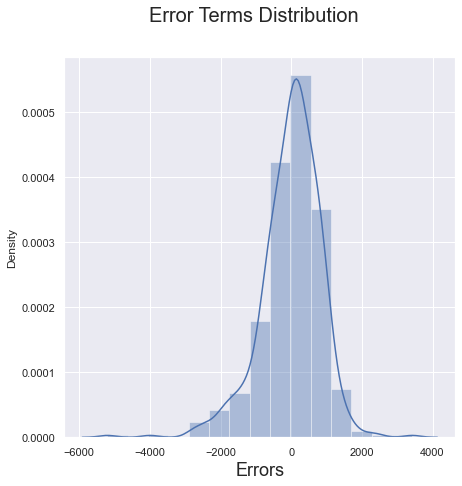

In [43]:
fig = plt.figure(figsize = (7,7))
sns.distplot((y_train - y_train_count), bins =15)
fig.suptitle('Error Terms Distribution', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

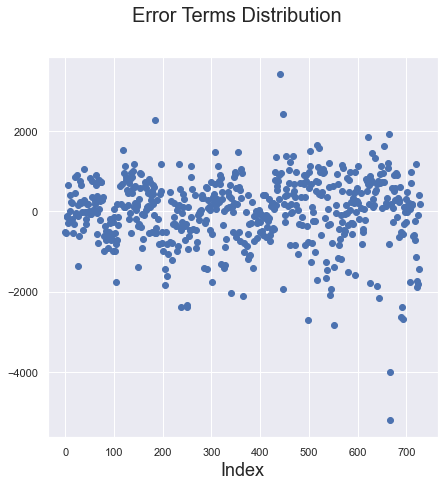

In [44]:
fig = plt.figure(figsize = (7,7))
res = y_train - y_train_count
plt.scatter(X_train.index,res)
fig.suptitle('Error Terms Distribution', fontsize = 20)                 
plt.xlabel('Index', fontsize = 18) 
plt.show()

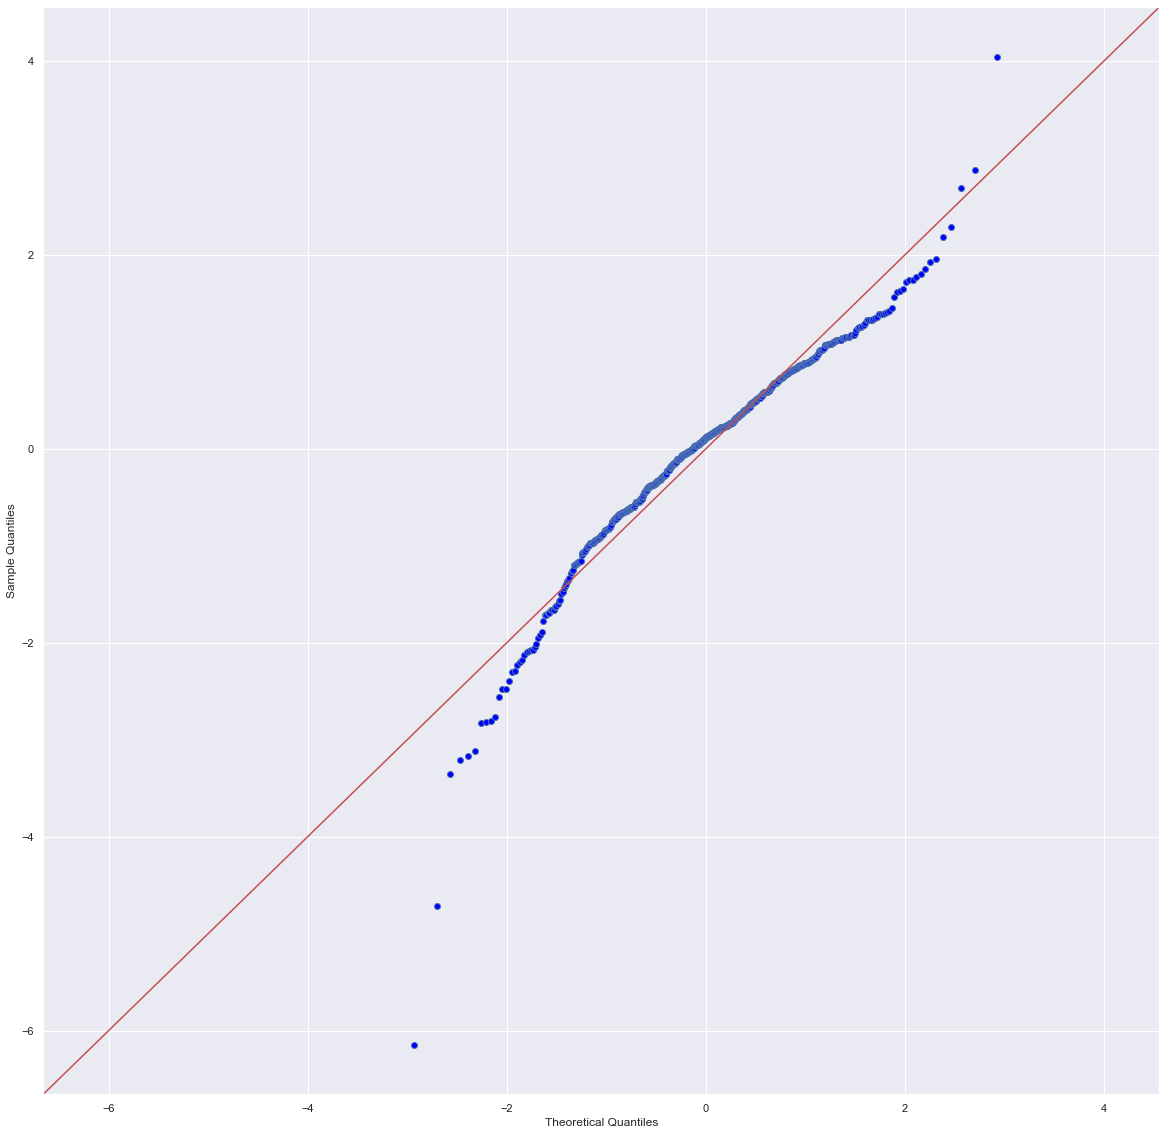

In [45]:
sm.qqplot(res,fit=True,line='45') 
plt.show()

<blockquote>
    
    1. From the distribution plot of residues - it is normally distributed around the mean zerio and hence validates the assumption of linear regression - that errors must be normally distributed 
    
    2. There is no visible pattern in the residual distribution against indices. The variance is also not too broad - however we can notice some slightly larger variance towards the end of the data set.
    
    3. The Q-Q plot shows that the errors are normally distributed (between -2 and 2 it is pretty much a straight line)  - however it shows a slight left skew beyond -2 quantile.
    
</blockquote>

# Prediction and Model Evaluation

### Transforming the Training Set

In [46]:
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [47]:
# dividing it into X and y
y_test = bike_test.pop("cnt")
X_test = bike_test

In [48]:
#Currently the columns are stores in the data frame temp that was used for modelling
temp.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'Good',
       'December', 'November', 'September'],
      dtype='object')

In [49]:
X_test_m = X_test[temp.columns]

In [50]:
#adding constant
X_test_m = sm.add_constant(X_test_m)
#predicting on y_test
y_test_m = linear_model.predict(X_test_m)

### Evaluation

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_m)

0.7792635258963293

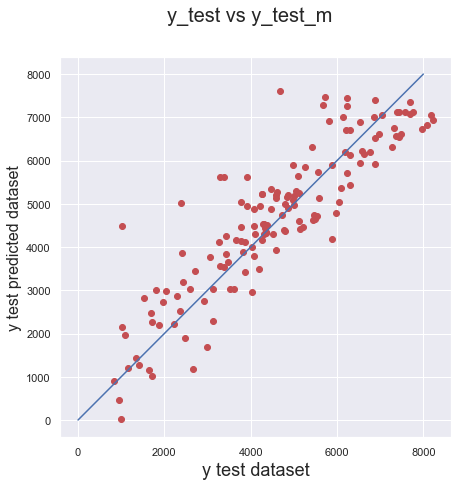

In [53]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.scatter(y_test,y_test_m, marker = "o", color = "r")
ax.plot([0,8000],[0,8000], color = "b")
fig.suptitle('y_test vs y_test_m', fontsize=20)               
plt.xlabel('y test dataset', fontsize=18)                          
plt.ylabel('y test predicted dataset', fontsize=16) 
plt.show()

<blockquote> Hence the model predicted <b>77.92%</b> of the variation in the training dataset. </blockquote>

# SUMMARY

## Model

<blockquote> <b>MODEL</b> : 3339.8603* <b>temp </b> + 2084.3175*<b>Year </b>+791.4712*<b>Good Weather</b>+592.1710*<b>Winter Season</b>+ 453.5855*<b>September Month </b> - 638.7853*<b>November Month</b> -515.34*<b>December Month </b> -679.95*<b>holiday </b> - 1183.7519* <b>Windspeed </b> - 1163.2126 *<b>Spring Season</b> + 1763.5623 </blockquote>

## Evaluation Metrics

<blockquote> 
    
    1.R2 Score on Test Data Set :0.7792
    
    2.Adjusted R2 Score on Train Data Set : 0.809
    
</blockquote>

In [54]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     247.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          9.87e-201
Time:                        11:55:56   Log-Likelihood:                -4765.2
No. Observations:                 584   AIC:                             9552.
Df Residuals:                     573   BIC:                             9601.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1763.5623    213.524      8.259      0.0

## Conclusion

The model predicts that :

1. For a unit increase in Temperature - the demand increases by 3339.8603 units
2. There is also an increase in demand - ALthough only 2 year data has been given the demand increased by 2084.3175 units from 2018 - 2019
3. When the weather is good - a unit increase in this variable - the demand increases by 791.4712 units.
4. When the season is winter we can see that a unit increase in this variable causes the demand to rise by 592.17 units
5. September Month has a clear influence on the demand and the demand for bikes increase by 453.5855 units. However November and December has a negative influence. The demand decreases by 638.7853 units and 515.34 units respectively for unit increase in the mentioned months variables
6. Windspeed and Spring has the largest negative influence on the bike demand and causes it to fall by 1183 units and 1163 units respectively for a unit increase in each of them. 
7. Holiday varaible also has a negative influence. A unit increase in holiday variable causes a decrease of demand by 679 units 
8. As for constant - there is an increase of demand by 1763 units even if all the variables are absent.